<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [154]:
! ls ../dat

new.csv.gz  past.csv.gz


In [155]:
# YOUR CODE HERE
import pandas as pd
# pd.set_option('display_max_columns',None)
path = '../dat/past.csv.gz'
df = pd.read_csv(path,delimiter=',')
df.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

#### Amount that was purchased
- From my perspective, the data is imbalanced toward situations where the purchase did not happen. However, I am not sure if that matters as much in this domain. I think it is common for there to be a lot of "window shopping." Most people will not buy anything at that moment, but they will come back later possibly. 

In [156]:
# YOUR CODE HERE
percent_purchase = df['Purchased?'].value_counts(normalize=True) * 100
percent_purchase

0    65.62
1    34.38
Name: Purchased?, dtype: float64

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [157]:
# YOUR CODE HERE
df = df.drop(columns=['product_id','user_id'],axis=1)
# YOUR CODE HERE
y = df['Purchased?']
df

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000
1,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,3.750000,2.250000,...,0.250000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000
2,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,17.250000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000
3,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,3.250000,10.500000,...,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000
4,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,4.875000,3.375000,...,0.250000,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,14.500000,3.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,23.590909,29.863636,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,22.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000


In [158]:
df = df.drop(columns=['Purchased?'],axis=1)
assert df.shape == (5000, 34)
# assert df.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [159]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [161]:
pca = PCA(n_components=5)

X_reduced = pca.fit_transform(X_scaled)

In [162]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [163]:
# YOUR CODE HERE
pca.explained_variance_

array([3.39381198, 3.11770028, 2.14821527, 1.68278415, 1.39399955])

In [164]:
sum(pca.explained_variance_ratio_)

0.35558072490595827

#### If we run PCA only 5 components, we do not capture much of the variance

In [165]:
pca_all = PCA(n_components=34)
X_all = pca_all.fit_transform(df)

In [166]:
sum(pca_all.explained_variance_ratio_)

0.9999999999999997

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [167]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [168]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

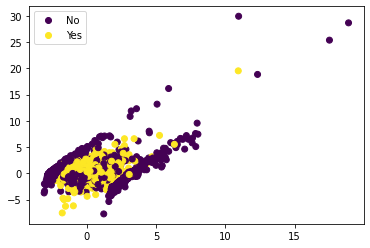

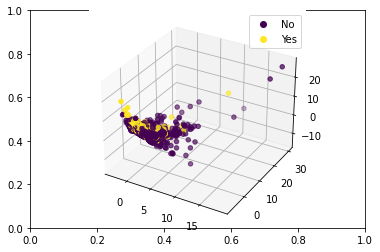

In [169]:
# YOUR CODE HERE
visualize_2pcs(X_reduced,y)

# YOUR CODE HERE
visualize_3pcs(X_reduced,y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [170]:
# YOUR CODE HERE (imports!)
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [171]:


def train(X, y, standardize = True) -> None:
    # split
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    
    # pipeline
    pipe = Pipeline([('scaler',StandardScaler()), ('model',LogisticRegression(random_state=0))])
    
    # fit pipeline
    pipe.fit(X_train,Y_train)
    
    # score pipeline
#     print(pipe.score(Y_train, Y_test))
    
    # predict
    Y_pred = pipe.predict(X_test)
    
    print(classification_report(Y_test,Y_pred,labels=[0,1]))
                                
train(df,y,True)

              precision    recall  f1-score   support

           0       0.66      0.93      0.78       659
           1       0.41      0.09      0.15       341

    accuracy                           0.65      1000
   macro avg       0.54      0.51      0.46      1000
weighted avg       0.58      0.65      0.56      1000



<!-- Now apply the pipeline on the all the features `X` and review the performance -->

In [172]:
# YOUR CODE HERE
# use synthetic features next
train(X_all,y,True)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       659
           1       0.72      0.50      0.59       341

    accuracy                           0.76      1000
   macro avg       0.75      0.70      0.71      1000
weighted avg       0.76      0.76      0.75      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [173]:
## code above ^^

8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [174]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

In [178]:
X = df

k = 2

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [188]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        model = KMeans(k)
        output = model.fit(X)
        inertias.append(
            output.inertia_ 
        )
        # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

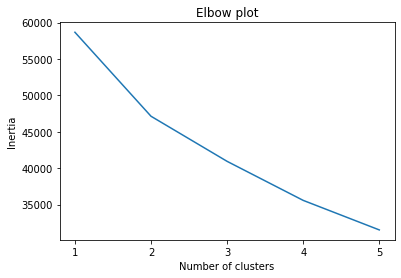

In [199]:
# YOUR CODE HERE
visualize_elbow(X_reduced,[1,2,3,4,5])

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*
    The disadvantage is that one has to use a form of gut or intuition to really determine what the correct number of clusters will be. We don't have necessarily an objective scoring metric to use, and we can only "eyeball" a graph and judge from our best interpretation what the most effective number of clusters should be.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [192]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2504044721170566
For n_clusters = 3 The average silhouette_score is : 0.2585988946564579
For n_clusters = 4 The average silhouette_score is : 0.27192307987509967
For n_clusters = 5 The average silhouette_score is : 0.2772819123147587
For n_clusters = 6 The average silhouette_score is : 0.24244505299882843


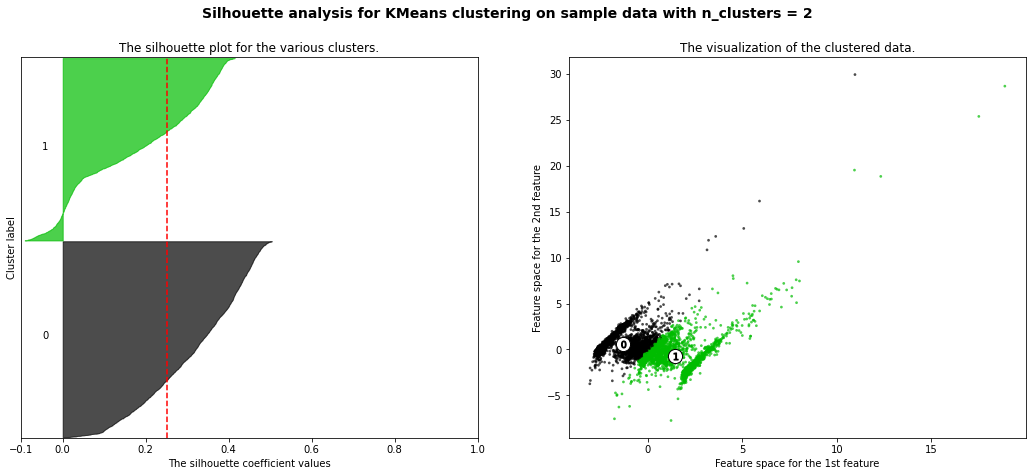

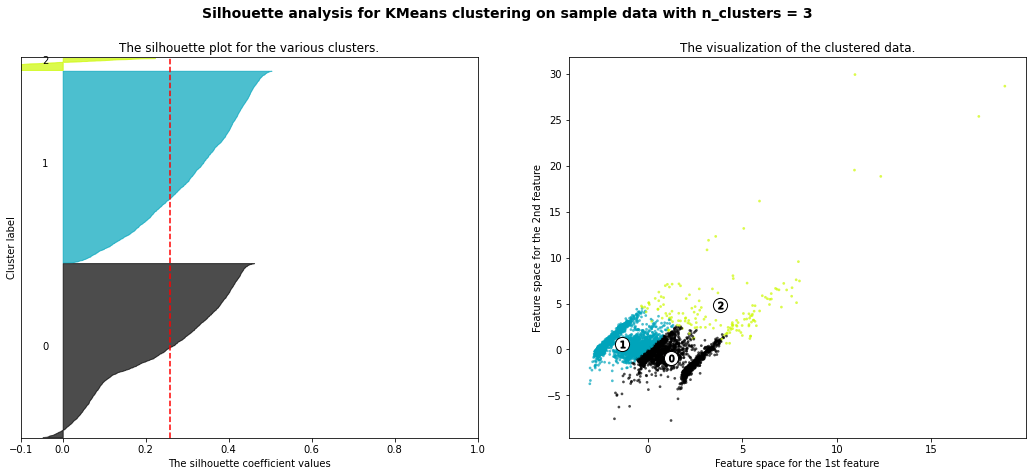

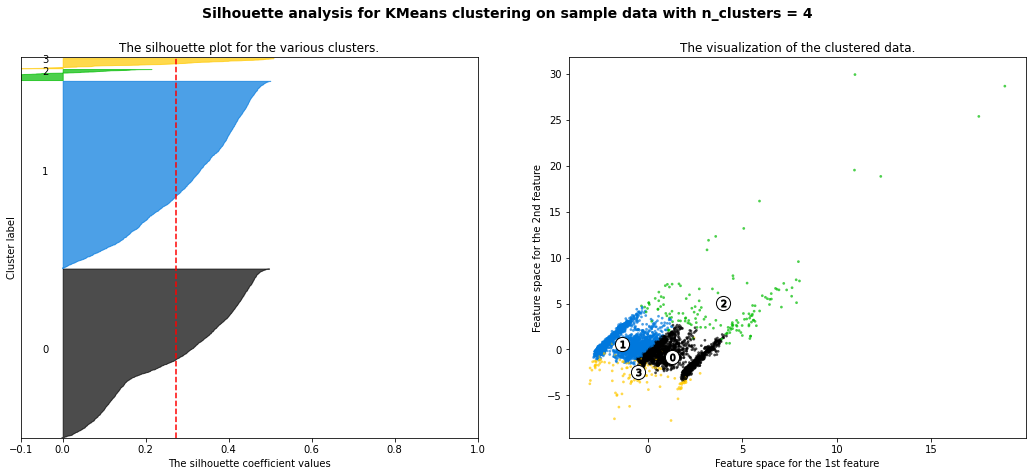

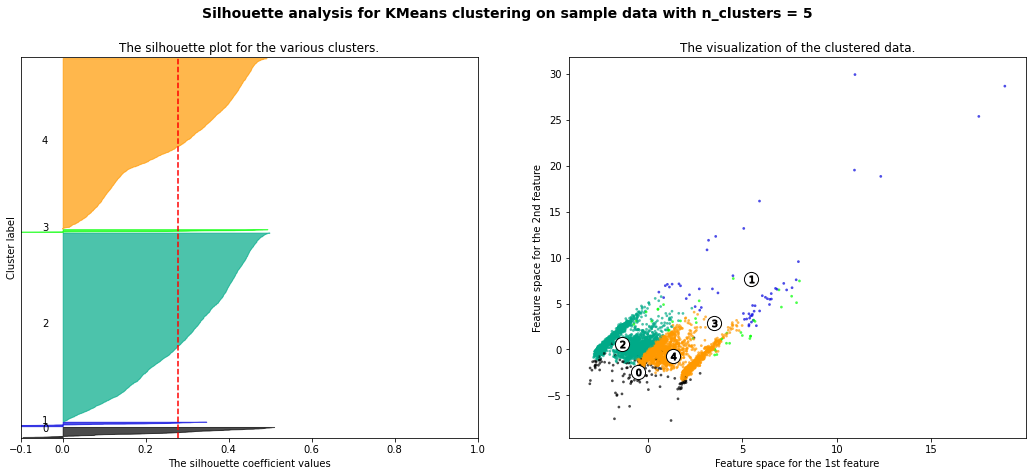

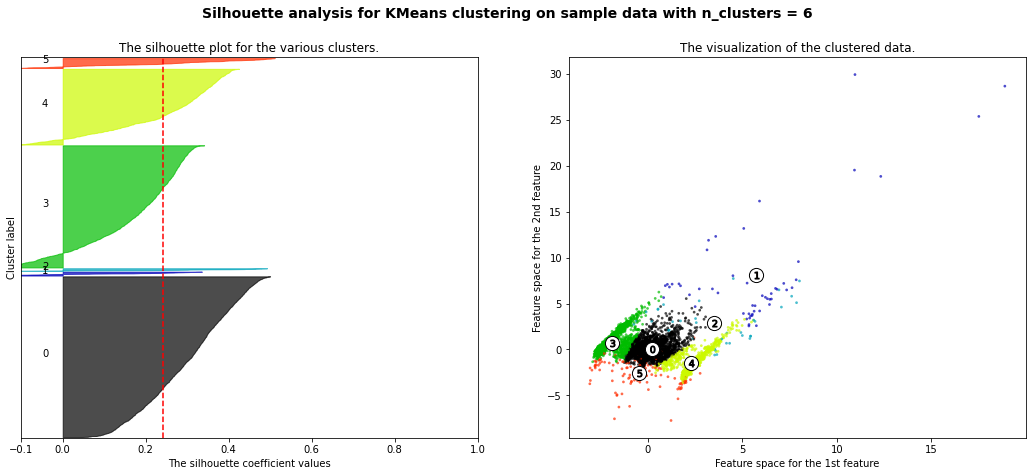

In [201]:
# YOUR CODE HERE
visualize_silhouette(6,X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [207]:
# YOUR CODE HERE
km = KMeans(n_clusters=5,random_state=10)

km = km.fit(X_reduced)

7. What is the size of each cluster? 

In [208]:
# YOUR CODE HERE
# cluster centers can be used

for i in range(len(km.cluster_centers_)):
    print("Cluster", i)
    print("Center:", km.cluster_centers_[i])
    print("Size:", sum(km.labels_ == i))

Cluster 0
Center: [-0.50159518 -2.50955367  4.93931555  3.17065075  0.04498499]
Size: 135
Cluster 1
Center: [ 5.45387372  7.64616792  3.28961093 -0.66575127 -0.25713095]
Size: 59
Cluster 2
Center: [-1.34628876  0.60590312 -0.08972729 -0.05155292 -0.02853588]
Size: 2505
Cluster 3
Center: [ 3.51752239  2.87663846 -5.15430892  8.7964386  -2.53885251]
Size: 36
Cluster 4
Center: [ 1.32086504 -0.76542183 -0.19892833 -0.25443279  0.07592884]
Size: 2265


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [211]:
# YOUR CODE HERE
path = '../dat/past.csv.gz'
past = pd.read_csv(path,delimiter=',')

km_predict = km.predict(X_reduced)

past['cluster_pca'] = km_predict

past

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000,4
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000,4
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000,4
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000,4
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000,4
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455,2
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000,4
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000,4


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*
    I can take steps to make this information actionable at this point for the business stakeholder. 
    By determining and visualizing which cluster the items will belong to I can create a visualization of the whether the item was purchased or not. Then we can make a determination of which items should be marked down based on the cluster that the item appears in.
    
    - Let's look at Sales (i.e. successful Purchases) by Cluster

In [226]:
# YOUR CODE HERE
plot_data = past.
plot_data
# cluster_labels = [0,1,2,3,4]
# # cluster_sizes = [num for num in range(len(km.cluster_centers_))]
# fig1,ax1 = plt.subplots()

# pie = plt.pie(
#                 plot_data,
#                 labels=cluster_labels,
#                 shadow=True,
#                 startangle=90
#              )

# pie.axis('equal') # draw as even circle

# pie.show()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
cluster_pca,,,,,,,,,,,,,,,,,,,,,
0,736144090,7.227742e+10,194.783750,158.675098,1.363027e+07,8265.973334,8258.990803,16.208033,164.774091,9.125688,...,22.028645,30.322385,7.693517,25.423089,26.484665,24.067059,9.057392,56,11.951893,142.245487
1,338274977,2.944466e+10,490.116667,272.716667,2.098712e+08,321.350857,307.735571,114.223810,225.961905,136.850000,...,6.676190,11.480952,4.533333,6.492857,19.411905,4.088095,7.000000,7,5.992857,142.488095
2,13885394235,1.290607e+12,4751.511395,3232.768818,4.735782e+08,14178.825872,14125.037049,1357.388635,2115.204962,1015.126835,...,607.014543,517.550306,169.006837,416.491027,597.307125,437.215502,223.486832,892,143.942374,2837.746359
3,210679398,1.785355e+10,90.750000,53.333333,3.276579e+07,174.988333,159.265000,37.916667,10.166667,42.333333,...,3.666667,11.416667,3.750000,3.333333,10.083333,4.500000,2.333333,2,0.583333,50.666667
4,12698143291,1.207460e+12,4228.237708,2917.765966,5.152715e+08,14346.863319,14280.574571,1184.025694,1952.326060,864.522554,...,210.268134,495.785726,144.518305,361.639494,566.773760,376.164510,185.871574,762,134.246631,2545.493957


10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*
The first assumption is that we must acknowledge that the k-means algorithm clusters data into spherical shapes, and second that the clusters are of similar size if the optimum cluster number has been determined and selected. The spherical assumption helps in separating the clusters when the algorithm works on the data and forms clusters.
    
The approach is good for data that is well organized, relatively uniform, and does not have a significant number of extreme outliers. This is because k-means has trouble clustering data where clusters are of varying sizes and density. 

In [23]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [227]:
# YOUR CODE HERE
new_path = '../dat/new.csv.gz'
new = pd.read_csv(new_path,delimiter=',')

In [228]:
assert new.shape == (30091, 5)

In [229]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

In [230]:
shapes = {
'new': new.shape,
'past': past.shape
}
shapes

{'new': (30091, 5), 'past': (5000, 38)}

        *YOUR ANSWER HERE*
This new dataset counts a much large set of data.


*The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [233]:
# YOUR CODE HERE
import numpy as np

In [237]:
intersects = np.intersect1d(new,past)
intersects = pd.DataFrame(intersects)
intersects

,0
0,0.00
1,0.05
2,0.08
3,0.10
4,0.16
...,...
1829,4647.00
1830,4689.00
1831,5013.00
1832,5143.00


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [254]:
percent = (past['Purchased?'] == 1).sum() / len(past) * 100

percent
# YOUR CODE HERE # ~.344

34.38

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [265]:
# YOUR CODE HERE
# past = past.drop('product_id',axis=1)
new_sample = new.sample(n=len(past))
new_sample

,product_id,maxPrice,minPrice,Purchased?,Category
1248,5887286,2.980000,2.980000,1,1.571429
23820,5835125,5.710000,5.710000,0,1.000000
312,5893845,1.720000,1.720000,1,1.115385
805,5870370,2.060000,2.060000,1,1.750000
10566,5825240,15.303333,15.303333,0,1.000000
...,...,...,...,...,...
9230,5825539,12.540000,12.540000,0,4.000000
13854,5903727,1.350000,1.350000,0,1.000000
17104,4661,4.732500,4.732500,0,1.000000
10061,5906176,1.430000,1.430000,1,1.000000


In [268]:
X_train,X_test,y_train,y_test = train_test_split(past,new_sample['Purchased?'],random_state=42,test_size=0.2)

In [270]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

# assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
# assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [271]:
# YOUR CODE HERE

def train(X, y, standardize = True) -> None:
    # split
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    
    # pipeline
    pipe = Pipeline([('scaler',StandardScaler()), ('model',LogisticRegression(random_state=0))])
    
    # fit pipeline
    pipe.fit(X_train,Y_train)
    
    # score pipeline
#     print(pipe.score(Y_train, Y_test))
    
    # predict
    Y_pred = pipe.predict(X_test)
    
    print(classification_report(Y_test,Y_pred,labels=[0,1]))
                                
train(past,new_sample['Purchased?'],True)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       663
           1       0.75      0.01      0.02       337

    accuracy                           0.67      1000
   macro avg       0.71      0.50      0.41      1000
weighted avg       0.69      0.67      0.54      1000



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [346]:
# YOUR CODE HERE

# remove labels from the test set
new_X_test = new.drop('Purchased?',axis=1)
new_X_train = past

# concatencate rows from X_test and rows from X_train (renamed)
all_features = pd.concat((new_X_train, new_X_test))

# isolate and use features from the test set and training set
X = all_features[['product_id','maxPrice','Purchased?']]
X

,product_id,maxPrice,Purchased?
0,NaN,15.84000,0.0
1,NaN,5.80000,0.0
2,NaN,6.27250,0.0
3,NaN,5.56000,0.0
4,NaN,4.08625,1.0
...,...,...,...
30086,5692521.0,5.79000,NaN
30087,5886768.0,1.59000,NaN
30088,5730974.0,6.35000,NaN
30089,6385.0,3.47250,NaN


In [320]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [345]:
# YOUR CODE HERE

# create an array to be vectorized, it is the same length as X
arr = [-1 for x in range(0,len(X)-len(y_train))]

# vectorize
vector = pd.DataFrame(arr)

# concat with y_train
y_target = pd.concat((y_train,vector))

# rename
y = y_target
y

,0
16114,0
28114,0
19909,0
5991,1
10169,0
...,...
31086,-1
31087,-1
31088,-1
31089,-1


In [342]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [323]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading

In [352]:
# X contains NA which we will replace with -1
X = X.fillna(-1)

In [378]:
l_spread = LabelSpreading(kernel='knn',alpha=0.01)

# flatten y, when y is a list
y

# fit semi supervised propagation model to X
l_prop = l_spread.fit(X,y)

l_preds = l_prop.predict(X)

/Users/mattrobinson/Library/Python/3.8/lib/python/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [385]:
semi_sup_preds = l_preds # YOUR CODE HERE
len(semi_sup_preds)

35091

In [391]:
len(y)

35091

In [388]:
assert semi_sup_preds.shape[0] == X.shape[0]

10. Print the classification report

In [392]:
print(classification_report(y, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     31091
           0       0.06      0.82      0.12      2654
           1       0.42      0.39      0.40      1346

    accuracy                           0.08     35091
   macro avg       0.16      0.40      0.17     35091
weighted avg       0.02      0.08      0.02     35091



/Users/mattrobinson/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattrobinson/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattrobinson/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [393]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

    *YOUR ANSWER HERE*
    This experiment was not successful and I need to revisit this. 

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)